In [4]:
# load libraries to perform title matching

import pandas as pd

/Users/jdavidmartinezg/.pyenv/versions/3.9.6/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jdavidmartinezg/.pyenv/versions/3.9.6/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [5]:
data = pd.read_csv('items.csv')
embeddings = pd.read_csv('title_embeddings.csv')

In [3]:
data.head(5)

,title,price,currency_id,thumbnail_id
0,Twice 11th Mini Album - Between 1&2,189905.0,COP,D_856090-MLU70140317571_062023-I
1,Cd - Amor Amarillo - Gustavo Cerati,70000.0,COP,D_735151-MLU73725568023_122023-I
2,Arctic Monkeys - Am,70000.0,COP,D_890982-MLU74223263112_022024-I
3,Arctic Monkeys - Favourite Worst Nightmare,50000.0,COP,D_610357-MLU69233737949_052023-I
4,Cd - Blue Banisters - Lana Del Rey,70000.0,COP,D_957581-MLA49063252094_022022-I


In [10]:
embeddings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.109536,-0.139807,-0.009414,0.122430,0.025472,0.057095,0.058942,-0.042219,-0.124643,0.123201,...,-0.121712,-0.058883,0.019047,-0.008159,-0.023822,-0.072072,-0.029522,0.016719,-0.046185,-0.150388
1,-0.002719,-0.122907,-0.017678,0.052697,0.031530,0.017538,-0.157780,-0.017818,-0.053753,0.142369,...,-0.081119,-0.025757,-0.030348,0.001989,-0.008563,0.147874,-0.037661,0.057542,-0.015851,-0.074364
2,-0.023866,-0.074612,-0.004249,0.033785,0.059007,0.074934,-0.035740,-0.002161,0.037321,-0.031436,...,0.037225,-0.172226,-0.031880,-0.084705,-0.034849,-0.237405,0.050782,0.203844,0.062928,0.033567
3,0.041765,0.010282,-0.007706,-0.044884,0.066232,0.127808,-0.026219,-0.027963,0.049486,-0.038648,...,-0.002340,-0.096886,-0.061347,-0.034160,0.037510,-0.086052,0.021444,0.084551,0.064914,-0.035562
4,-0.001491,-0.007663,-0.015113,0.154771,-0.085909,0.047144,0.069691,-0.046122,-0.110893,0.109854,...,-0.048673,-0.006734,-0.009917,0.083091,0.008992,-0.087841,-0.080416,0.011606,-0.081606,-0.095569


In [9]:
# delete Unnamed: 0 column

embeddings = embeddings.drop('Unnamed: 0', axis=1)

In [11]:
# each row in the embeddings dataframe corresponds to a vector representation of the title in the data dataframe

# calculate the cosine similarity between the embeddings of the titles

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(embeddings)

# create a dataframe with the cosine similarities

cosine_sim_df = pd.DataFrame(cosine_sim, columns=data['title'], index=data['title'])

cosine_sim_df.head(5)

title,Twice 11th Mini Album - Between 1&2,Cd - Amor Amarillo - Gustavo Cerati,Arctic Monkeys - Am,Arctic Monkeys - Favourite Worst Nightmare,Cd - Blue Banisters - Lana Del Rey,Taylor Swift Speak Now Taylor's Version 2 Cd Importado,Lover - Taylor Swift - Disco Cd - (18 Canciones),"Thank U , Next - Ariana Grande - Disco Cd - Nuevo",Gustavo Cerati - Ahí Vamos,Taylor Swift 1989 Taylors Version Cd Original Importado Versión Del Álbum Estándar,...,Álbum 5-star Limited + Set Pre-orden,Cd Linkin Park - Minutes To Midnight / Made In Eu - Nuevo,Vinilo Blurryface Twenty One Pilots,"Disco Vinilo Pink Floyd, Dark Side Of The Moon",Cristian Nodal - Forajido,Honeymoon - Lana Del Rey - Disco Cd - (14 Canciones,Somewhere In Time / Deluxe - Iron Maiden - Boxset Disco Cd,Disco De Vinilo Harry Styles,Linkin Park Hybrid Theory 20th Anniversary Edition 4lp,Lp - Grupo Niche No Hay Quinto Malo
title,,,,,,,,,,,,,,,,,,,,,
Twice 11th Mini Album - Between 1&2,1.000000,0.379764,0.140251,0.136277,0.448284,0.356139,0.559854,0.537242,0.213002,0.403859,...,0.655848,0.414223,0.279730,0.396360,0.217804,0.523386,0.546234,0.502337,0.232729,0.361655
Cd - Amor Amarillo - Gustavo Cerati,0.379764,1.000000,0.107004,0.104228,0.554569,0.296554,0.512827,0.570614,0.661193,0.253697,...,0.472659,0.394694,0.313035,0.491553,0.308760,0.511173,0.469234,0.584874,0.167901,0.261167
Arctic Monkeys - Am,0.140251,0.107004,1.000000,0.779027,0.159646,0.036333,0.095563,0.113789,0.148865,0.027111,...,0.158326,0.189888,0.235316,0.230687,0.128671,0.117653,0.078093,0.129340,0.028120,0.129940
Arctic Monkeys - Favourite Worst Nightmare,0.136277,0.104228,0.779027,1.000000,0.107033,-0.003894,0.077034,0.059413,0.163454,0.052117,...,0.100906,0.129096,0.192036,0.177522,0.077009,0.122004,0.038010,0.117302,0.038399,0.128030
Cd - Blue Banisters - Lana Del Rey,0.448284,0.554569,0.159646,0.107033,1.000000,0.351705,0.513218,0.559564,0.326204,0.353314,...,0.541279,0.508443,0.362727,0.524398,0.381512,0.561486,0.589838,0.636801,0.329267,0.311208


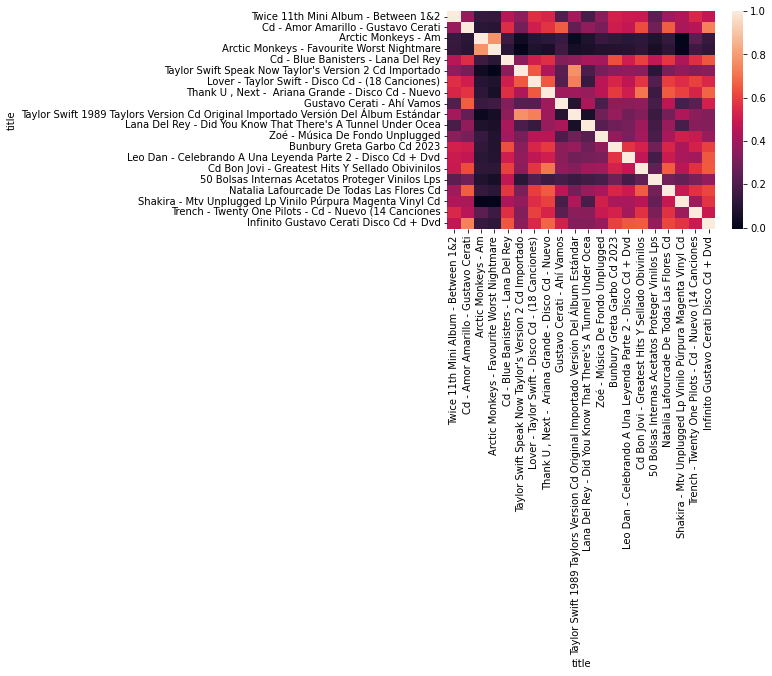

In [15]:
# plot the cosine similarity matrix, which is a heatmap

import seaborn as sns

# plot the cosine similarity matrix for the first 20 titles

sns.heatmap(cosine_sim_df.iloc[:20, :20])


In [25]:
# create a function that takes a title as input and returns the top 5 most similar titles, with their respective row indexes and cosine similarities

def get_similar_titles(title, cosine_sim_df):
    # get the row index of the title
    idx = cosine_sim_df.columns.get_loc(title)
    # get the cosine similarities of the title with all other titles
    sim_scores = list(enumerate(cosine_sim_df.iloc[idx]))
    # sort the titles based on the cosine similarities
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # get the row indexes of the top 5 most similar titles
    sim_scores = sim_scores[1:6]
    # get the titles and cosine similarities of the top 5 most similar titles
    similar_titles = [(cosine_sim_df.columns[i], score) for i, score in sim_scores]
    return similar_titles

In [27]:
# return 5 random items from the data dataframe and the column title

data.sample(5)['title']

892    Lana Del Rey - Born To Die -  Cd Nuevo Edc Sta...
585                           Mago De Oz - Bandera Negra
292                               Pink Floyd Animals Cd 
372                                           Adele - 25
610                      Michael Jackson - Thriller - Cd
Name: title, dtype: object

In [29]:
get_similar_titles("Michael Jackson - Thriller - Cd", cosine_sim_df)

[('Michael Jackson - Thriller - Cd Importado Original', 0.9461709259868158),
 ('Vinilo Michael Jackson Thriller Nuevo Sellado Envío Gratis',
  0.8501498669816675),
 ('Michael Jackson Lp Thriller Vinilo Nuevo Importado', 0.8325719532351761),
 ('Vinilo: Michael Jackson - Bad', 0.8230627121736473),
 ('Michael Jackson - History Past, Present And Future Book I ',
  0.7615265617672393)]

In [6]:
# return df items with the title "Michael Jackson - Thriller - Cd"

data[data['title'] == "Michael Jackson - Thriller - Cd"]

,title,price,currency_id,thumbnail_id
610,Michael Jackson - Thriller - Cd,60000.0,COP,D_610510-MCO73223374560_122023-I
